Data Source: https://multimil.readthedocs.io/en/latest/notebooks/mil_classification.html

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Explore data

In [ ]:
!pip install git+https://github.com/SaminRK/scPSS.git

  Cloning https://github.com/SaminRK/scPSS.git to /tmp/pip-req-build-xitg6tn2
  Running command git clone --filter=blob:none --quiet https://github.com/SaminRK/scPSS.git /tmp/pip-req-build-xitg6tn2
  Resolved https://github.com/SaminRK/scPSS.git to commit 4a89b6f4ad35328a5f2a8235ca461272b2713007
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.2/119.2 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 8.7 MB/s eta 0:00:00
  Created wheel for scPSS: filename=scPSS-0.1.0-py3-none-

In [ ]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
ad_total = sc.read('/content/drive/MyDrive/Research - Sohel sir/Pathological Cells/Pathological Cell Identification/data/HCLA/hcla_tutoral.h5ad')

/usr/local/lib/python3.10/dist-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [ ]:
ad_total

AnnData object with n_obs × n_vars = 450214 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'ann_level_1_label_final', 'ann_level_2_label_final', 'ann_level_3_label_final', 'ann_level_4_label_final', 'ann_level_5_label_final'
    obsm: 'X_umap'

In [ ]:
celltype = 'Macrophages'

In [ ]:
ad = ad_total[ad_total.obs['ann_level_3_label_final'] == celltype]

In [ ]:
ad

View of AnnData object with n_obs × n_vars = 158750 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'ann_level_1_label_final', 'ann_level_2_label_final', 'ann_level_3_label_final', 'ann_level_4_label_final', 'ann_level_5_label_final'
    obsm: 'X_umap'

## Explore each cell type separately

In [ ]:
SAMPLE_SIZE = 100000
if len(ad) > SAMPLE_SIZE: sc.pp.subsample(ad, n_obs=SAMPLE_SIZE)

In [ ]:
ad

AnnData object with n_obs × n_vars = 100000 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'ann_level_1_label_final', 'ann_level_2_label_final', 'ann_level_3_label_final', 'ann_level_4_label_final', 'ann_level_5_label_final'
    obsm: 'X_umap'

In [ ]:
sc.tl.pca(ad)

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/local/lib/python3.10/dist-packages/scanpy/plotting

[<Axes: title={'center': 'disease'}, xlabel='PC1', ylabel='PC2'>,
 <Axes: title={'center': 'donor_id'}, xlabel='PC1', ylabel='PC2'>]

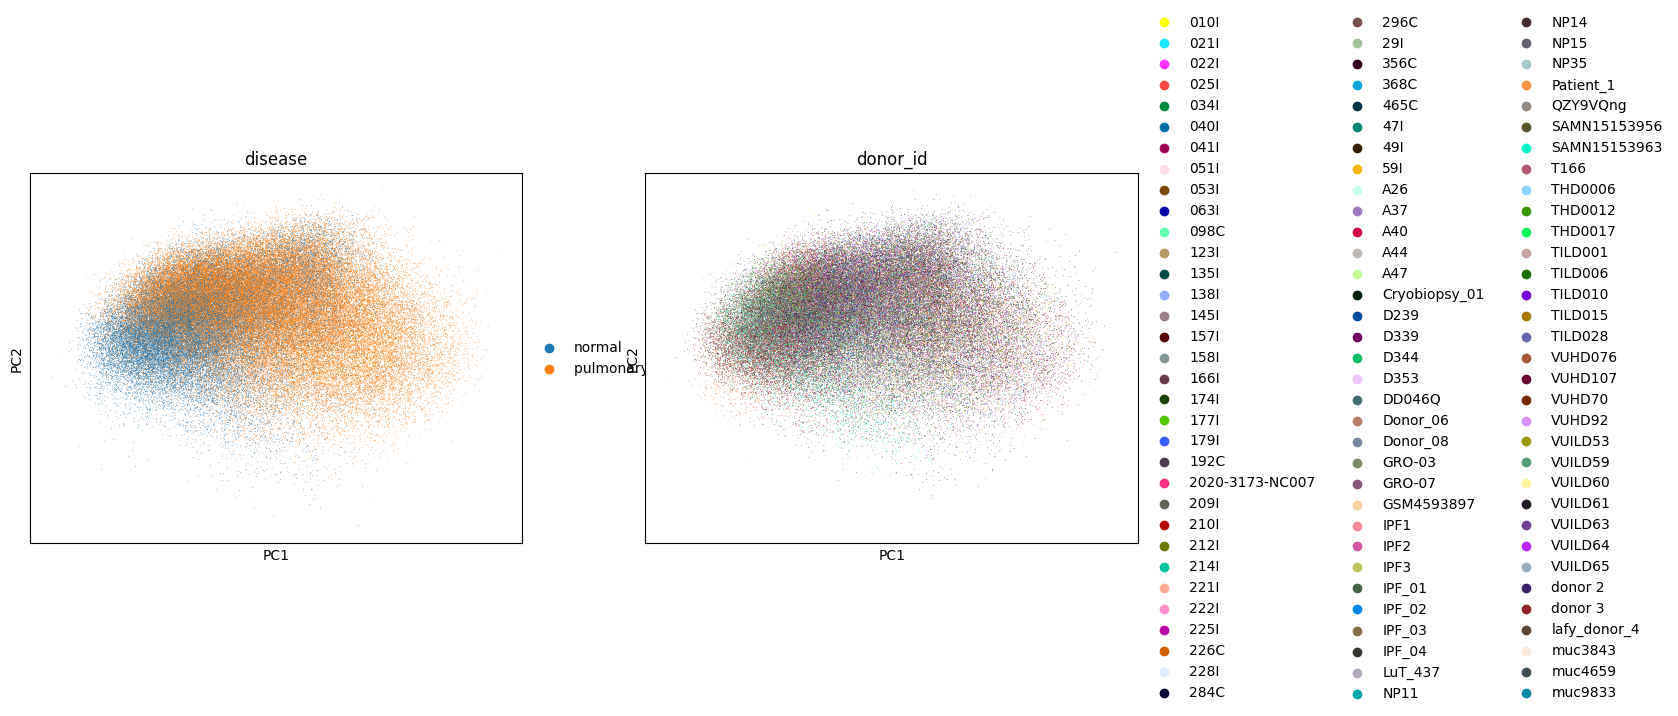

In [ ]:
sc.pl.pca(ad, color=['disease', 'donor_id'], show=False)

## Problem scenario: healthy reference and diseased reference available

In [ ]:
DONOR_KEY = 'donor_id'

In [ ]:
ad_normal = ad_total[ad_total.obs['disease'] == 'normal']
ad_disease = ad_total[ad_total.obs['disease'] == 'pulmonary fibrosis']

normal_donor_ids = list(ad_normal.obs[DONOR_KEY].unique())
disease_donor_ids = list(ad_disease.obs[DONOR_KEY].unique())

In [ ]:
len(normal_donor_ids), len(disease_donor_ids)

(59, 52)

In [ ]:
def get_upper_limit(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    upper_limit_from_data = q1
    for d in data:
        if d < upper_limit and d > upper_limit_from_data:
            upper_limit_from_data = d

    return upper_limit_from_data

In [ ]:
def plot_distance_distributions(dist_ref_ref, dist_que_ref, thres):
    import matplotlib.pyplot as plt

    plt.hist(dist_ref_ref, bins=100, alpha=.5, label='Reference-Reference')
    plt.hist(dist_que_ref, bins=100, alpha=.5, color='orange', label='Query-Reference')
    plt.axvline(thres, color='r', linestyle='--', label='threshold')
    plt.legend()
    plt.show()

In [ ]:
def plot_outlier_ratio_v_k(K_outlier_ratio_1, K_outlier_ratio_2, K_outlier_ratio_3, optimal_k):

    x_values, y_values = zip(*K_outlier_ratio_1)
    plt.plot(x_values, y_values, marker='o', linestyle='-', color='b', alpha=.8, label='p-value cutoff=0.1')

    x_values, y_values = zip(*K_outlier_ratio_2)
    plt.plot(x_values, y_values, marker='o', linestyle='-', color='r', alpha=.8, label='p-value cutoff=0.05')

    x_values, y_values = zip(*K_outlier_ratio_3)
    plt.plot(x_values, y_values, marker='o', linestyle='-', color='grey', alpha=.8, label='p-value cutoff=0.01')

    plt.axvline(optimal_k, color='purple', linestyle='--', label='Optimal k')
    plt.xlabel('K')
    plt.ylabel('Outlier ratio')
    plt.legend(loc='lower right')

    # Show the plot
    plt.show()
    plt.close()

In [ ]:
def plot_outlier_ratio_v_p(q_outlier_ratio, optimal_p):

    x_values, y_values = zip(*q_outlier_ratio)
    x_values_ = [1 - x for x in x_values]

    plt.plot(x_values_, y_values, marker='o', linestyle='-', color='b')
    plt.axvline(optimal_p, color='r', linestyle='--', label='Optimal p-value cutoff')
    plt.legend()

    plt.xlabel('p-value cutoff')
    plt.ylabel('Outlier ratio')

    plt.show()
    plt.close()

In [ ]:
def get_middle_limit(ref_normal, ref_disease):
    lower = np.percentile(ref_normal, 75)
    upper = np.percentile(ref_disease, 25)
    mid = (2 * upper + lower) / 3
    limit = max(mid, lower)

    return limit

In [ ]:
import gc
import random
import scanpy.external as sce
from scpss import scPSS


def process_celltype(seed):
    gc.collect()
    random.seed(seed)

    ref_normal_num_donors = len(normal_donor_ids) * 1 // 2
    ref_disease_num_donors = len(disease_donor_ids) * 1 // 2
    ref_normal_donor_ids = random.sample(normal_donor_ids, ref_normal_num_donors)
    que_normal_donor_ids = [d for d in normal_donor_ids if d not in ref_normal_donor_ids]
    ref_disease_donor_ids = random.sample(disease_donor_ids, ref_disease_num_donors)
    que_disease_donor_ids = [d for d in disease_donor_ids if d not in ref_disease_donor_ids]

    ref_donor_ids = ref_normal_donor_ids + ref_disease_donor_ids
    que_donor_ids = que_normal_donor_ids + que_disease_donor_ids

    print(len(ref_normal_donor_ids), len(ref_disease_donor_ids), len(que_normal_donor_ids), len(que_disease_donor_ids))

    ad_scpss = ad[ad.obs[DONOR_KEY].isin(ref_donor_ids + que_donor_ids)]
    sc.tl.pca(ad_scpss)
    sce.pp.harmony_integrate(ad_scpss, key='sample', max_iter_harmony=1)

    ref_normal_samples = ad_scpss[ad_scpss.obs[DONOR_KEY].isin(ref_normal_donor_ids)].obs['sample'].unique()
    ref_disease_samples = ad_scpss[ad_scpss.obs[DONOR_KEY].isin(ref_disease_donor_ids)].obs['sample'].unique()
    que_samples = ad_scpss[ad_scpss.obs[DONOR_KEY].isin(que_donor_ids)].obs['sample'].unique()

    scpss = scPSS(ad_scpss, 'sample', ref_normal_samples, ref_disease_samples)
    scpss.find_optimal_parameters(search_n_comps=np.arange(4, 16), verbose=True)
    best_params = scpss.best_params
    scpss.set_distance_and_condition()

    outlier_ratio_ref_normal_datasets = []
    outlier_ratio_ref_disease_datasets = []

    all_distances = scpss.ad.obs['scpss_distances']
    thres = best_params['threshold']

    from sklearn.neighbors import KNeighborsClassifier

    ad_ref_normal = scpss.ad[scpss.ad.obs[DONOR_KEY].isin(ref_normal_donor_ids)]
    ad_ref_diseased = scpss.ad[scpss.ad.obs[DONOR_KEY].isin(ref_disease_donor_ids)]

    X_ref_normal = ad_ref_normal.obsm['X_pca_harmony']
    X_ref_diseased = ad_ref_diseased.obsm['X_pca_harmony']

    X = np.vstack([X_ref_normal, X_ref_diseased])
    y_que = list(ad_ref_diseased.obs['scpss_distances'] > thres)
    y = np.array([0] * len(X_ref_normal) + y_que)

    knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
    knn.fit(X, y)

    print(knn.score(X, y))

    ad_que = ad_scpss[ad_scpss.obs[DONOR_KEY].isin(que_donor_ids)]
    X_que = ad_que.obsm['X_pca_harmony']
    y_pred = knn.predict(X_que)

    outlier_ratio_in_que_normal = []
    outlier_ratio_in_que_diseased = []

    for donor in que_normal_donor_ids:
        y = y_pred[ad_que.obs[DONOR_KEY] == donor]
        if len(y) > 10: outlier_ratio_in_que_normal.append(np.mean(y))
        else: outlier_ratio_in_que_normal.append(None)

    for donor in que_disease_donor_ids:
        y = y_pred[ad_que.obs[DONOR_KEY] == donor]
        if len(y) > 10: outlier_ratio_in_que_diseased.append(np.mean(y))
        else: outlier_ratio_in_que_diseased.append(None)

    y_pred_ref_normal = knn.predict(X_ref_normal)
    y_pred_ref_diseased = knn.predict(X_ref_diseased)

    outlier_ratio_in_ref_normal = []
    outlier_ratio_in_ref_diseased = []

    for donor in ref_normal_donor_ids:
        y = y_pred_ref_normal[ad_ref_normal.obs[DONOR_KEY] == donor]
        if len(y) > 10: outlier_ratio_in_ref_normal.append(np.mean(y))
        else: outlier_ratio_in_ref_normal.append(None)

    for donor in ref_disease_donor_ids:
        y = y_pred_ref_diseased[ad_ref_diseased.obs[DONOR_KEY] == donor]
        if len(y) > 10: outlier_ratio_in_ref_diseased.append(np.mean(y))
        else: outlier_ratio_in_ref_diseased.append(None)

    def filter_none(lst):
        return [x for x in lst if x is not None]

    def replace_none(lst):
        return [x if x is not None else 0 for x in lst]

    Dict = {
        'Outlier Ratio in Ref Normal'  : filter_none(outlier_ratio_in_ref_normal),
        'Outlier Ratio in Ref Diseased': filter_none(outlier_ratio_in_ref_diseased),
        'Outlier Ratio in Que Normal'  : filter_none(outlier_ratio_in_que_normal),
        'Outlier Ratio in Que Diseased': filter_none(outlier_ratio_in_que_diseased),
    }

    outlier_ratio_threshold = get_middle_limit(
        filter_none(outlier_ratio_in_ref_normal),
        filter_none(outlier_ratio_in_ref_diseased),
    )

    fig, ax = plt.subplots(figsize=(4, 3))
    ax.boxplot(Dict.values())
    ax.set_xticklabels(Dict.keys())
    plt.axhline(outlier_ratio_threshold, color='r', linestyle='--', label='Middle Point')
    plt.xticks(rotation=45)
    plt.show()

    que_outlier_ratios = outlier_ratio_in_que_normal + outlier_ratio_in_que_diseased
    predicted_labels = np.array(replace_none(que_outlier_ratios)) > outlier_ratio_threshold
    true_labels = [0] * len(outlier_ratio_in_que_normal) + [1] * len(outlier_ratio_in_que_diseased)

    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    Dict = {
        'problem': f'problem-2-{celltype}',
        'ref_normal_samples': ref_normal_donor_ids,
        'ref_disease_samples': ref_disease_donor_ids,
        'que_normal_samples': que_normal_donor_ids,
        'que_disease_samples': que_disease_donor_ids,
        'ref_samples': ref_donor_ids,
        'que_samples': que_donor_ids,
        'accuracy': accuracy,
        'precision': precision,
        'f1': f1,
        'recall': recall,
        'outlier_ratio_in_ref_normal': outlier_ratio_in_ref_normal,
        'outlier_ratio_in_ref_diseased': outlier_ratio_in_ref_diseased,
        'outlier_ratio_in_que_normal': outlier_ratio_in_que_normal,
        'outlier_ratio_in_que_diseased': outlier_ratio_in_que_diseased,
    }

    return Dict

In [ ]:
OUTPUT_PATH = "/content/drive/MyDrive/Research - Sohel sir/Pathological Cells/Pathological Cell Identification/reproducibility/scpss_data"

In [ ]:
import os
os.makedirs(f"{OUTPUT_PATH}/scpss-problem-2", exist_ok=True)
os.makedirs(f"{OUTPUT_PATH}/scpss-problem-2/{celltype}", exist_ok=True)

==> 0
29 26 30 26


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
2024-12-20 16:36:52,640 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
INFO:harmonypy:Computing initial centroids with sklearn.KMeans...
2024-12-20 16:37:12,474 - harmonypy - INFO - sklearn.KMeans initialization complete.
INFO:harmonypy:sklearn.KMeans initialization complete.
2024-12-20 16:37:13,410 - harmonypy - INFO - Iteration 1 of 1
INFO:harmonypy:Iteration 1 of 1
2024-12-20 16:38:55,011 - harmonypy - INFO - Stopped before convergence
INFO:harmonypy:Stopped before convergence


{'n_comps': 4, 'optimal_k': 12, 'optimal_p': 0.035000000000000024, 'threshold': 0.6828501754549475, 'outlier_ratio': 0.21122224549643903, 'ks': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'initial_p_vals': [0.1, 0.05, 0.01], 'ps': array([0.15 , 0.145, 0.14 , 0.135, 0.13 , 0.125, 0.12 , 0.115, 0.11 ,
       0.105, 0.1  , 0.095, 0.09 , 0.085, 0.08 , 0.075, 0.07 , 0.065,
       0.06 , 0.055, 0.05 , 0.045, 0.04 , 0.035, 0.03 , 0.025, 0.02 ,
       0.015, 0.01 , 0.005, 0.   ])}
{'n_comps': 5, 'optimal_k': 5, 'optimal_p': 0.035000000000000024, 'threshold': 0.8006810972647687, 'outlier_ratio': 0.19627147046501886, 'ks': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'initial_

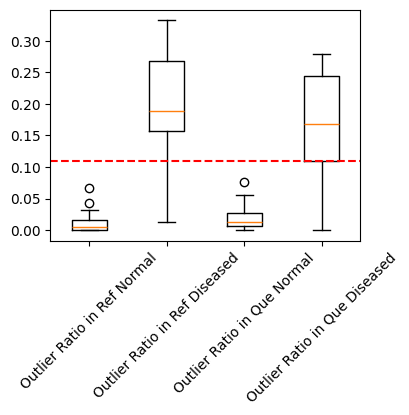

Accuracy: 0.875
Precision: 1.0
Recall: 0.7307692307692307
F1 Score: 0.8444444444444444
==> 1
29 26 30 26


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
2024-12-20 16:50:13,239 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
INFO:harmonypy:Computing initial centroids with sklearn.KMeans...
2024-12-20 16:50:32,926 - harmonypy - INFO - sklearn.KMeans initialization complete.
INFO:harmonypy:sklearn.KMeans initialization complete.
2024-12-20 16:50:33,669 - harmonypy - INFO - Iteration 1 of 1
INFO:harmonypy:Iteration 1 of 1
2024-12-20 16:52:14,122 - harmonypy - INFO - Stopped before convergence
INFO:harmonypy:Stopped before convergence


{'n_comps': 4, 'optimal_k': 15, 'optimal_p': 0.035000000000000024, 'threshold': 0.6848640489936757, 'outlier_ratio': 0.2227802459596935, 'ks': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'initial_p_vals': [0.1, 0.05, 0.01], 'ps': array([0.15 , 0.145, 0.14 , 0.135, 0.13 , 0.125, 0.12 , 0.115, 0.11 ,
       0.105, 0.1  , 0.095, 0.09 , 0.085, 0.08 , 0.075, 0.07 , 0.065,
       0.06 , 0.055, 0.05 , 0.045, 0.04 , 0.035, 0.03 , 0.025, 0.02 ,
       0.015, 0.01 , 0.005, 0.   ])}
{'n_comps': 5, 'optimal_k': 18, 'optimal_p': 0.04500000000000003, 'threshold': 0.9329065026292134, 'outlier_ratio': 0.2292189813920546, 'ks': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'initial_p_

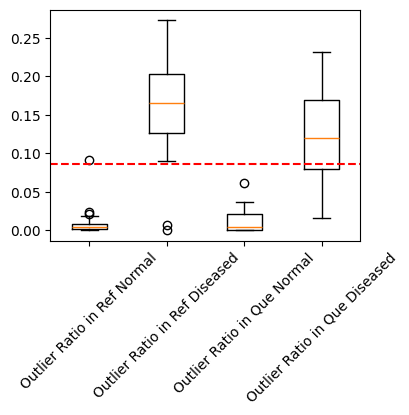

Accuracy: 0.875
Precision: 1.0
Recall: 0.7307692307692307
F1 Score: 0.8444444444444444
==> 2
29 26 30 26


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
2024-12-20 17:06:38,092 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
INFO:harmonypy:Computing initial centroids with sklearn.KMeans...
2024-12-20 17:07:00,716 - harmonypy - INFO - sklearn.KMeans initialization complete.
INFO:harmonypy:sklearn.KMeans initialization complete.
2024-12-20 17:07:01,577 - harmonypy - INFO - Iteration 1 of 1
INFO:harmonypy:Iteration 1 of 1
2024-12-20 17:08:35,617 - harmonypy - INFO - Stopped before convergence
INFO:harmonypy:Stopped before convergence


{'n_comps': 4, 'optimal_k': 28, 'optimal_p': 0.035000000000000024, 'threshold': 0.7451825857513681, 'outlier_ratio': 0.32653715915166637, 'ks': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'initial_p_vals': [0.1, 0.05, 0.01], 'ps': array([0.15 , 0.145, 0.14 , 0.135, 0.13 , 0.125, 0.12 , 0.115, 0.11 ,
       0.105, 0.1  , 0.095, 0.09 , 0.085, 0.08 , 0.075, 0.07 , 0.065,
       0.06 , 0.055, 0.05 , 0.045, 0.04 , 0.035, 0.03 , 0.025, 0.02 ,
       0.015, 0.01 , 0.005, 0.   ])}
{'n_comps': 5, 'optimal_k': 5, 'optimal_p': 0.035000000000000024, 'threshold': 0.7329151634712769, 'outlier_ratio': 0.2975583674924256, 'ks': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'initial_p

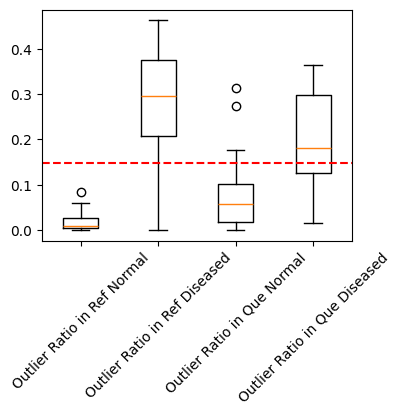

Accuracy: 0.7678571428571429
Precision: 0.8095238095238095
Recall: 0.6538461538461539
F1 Score: 0.723404255319149
==> 3
29 26 30 26


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
2024-12-20 17:24:40,555 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
INFO:harmonypy:Computing initial centroids with sklearn.KMeans...
2024-12-20 17:25:00,099 - harmonypy - INFO - sklearn.KMeans initialization complete.
INFO:harmonypy:sklearn.KMeans initialization complete.
2024-12-20 17:25:00,851 - harmonypy - INFO - Iteration 1 of 1
INFO:harmonypy:Iteration 1 of 1
2024-12-20 17:26:42,121 - harmonypy - INFO - Stopped before convergence
INFO:harmonypy:Stopped before convergence


{'n_comps': 4, 'optimal_k': 11, 'optimal_p': 0.04000000000000003, 'threshold': 0.6146400197405131, 'outlier_ratio': 0.2434761573584107, 'ks': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'initial_p_vals': [0.1, 0.05, 0.01], 'ps': array([0.15 , 0.145, 0.14 , 0.135, 0.13 , 0.125, 0.12 , 0.115, 0.11 ,
       0.105, 0.1  , 0.095, 0.09 , 0.085, 0.08 , 0.075, 0.07 , 0.065,
       0.06 , 0.055, 0.05 , 0.045, 0.04 , 0.035, 0.03 , 0.025, 0.02 ,
       0.015, 0.01 , 0.005, 0.   ])}
{'n_comps': 5, 'optimal_k': 6, 'optimal_p': 0.04500000000000003, 'threshold': 0.7443189394808406, 'outlier_ratio': 0.24268997006440687, 'ks': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'initial_p_v

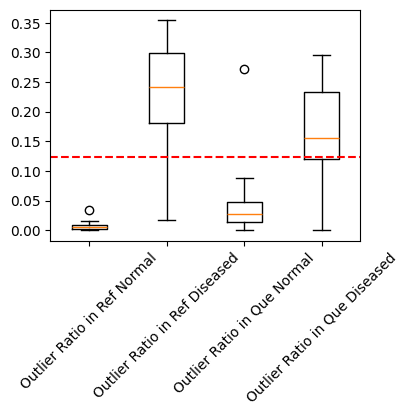

Accuracy: 0.8214285714285714
Precision: 0.9444444444444444
Recall: 0.6538461538461539
F1 Score: 0.7727272727272727
==> 4
29 26 30 26


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
2024-12-20 17:44:00,587 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
INFO:harmonypy:Computing initial centroids with sklearn.KMeans...
2024-12-20 17:44:20,481 - harmonypy - INFO - sklearn.KMeans initialization complete.
INFO:harmonypy:sklearn.KMeans initialization complete.
2024-12-20 17:44:21,210 - harmonypy - INFO - Iteration 1 of 1
INFO:harmonypy:Iteration 1 of 1
2024-12-20 17:45:53,844 - harmonypy - INFO - Stopped before convergence
INFO:harmonypy:Stopped before convergence


{'n_comps': 4, 'optimal_k': 17, 'optimal_p': 0.04000000000000003, 'threshold': 0.6441561417069683, 'outlier_ratio': 0.28305879661404715, 'ks': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'initial_p_vals': [0.1, 0.05, 0.01], 'ps': array([0.15 , 0.145, 0.14 , 0.135, 0.13 , 0.125, 0.12 , 0.115, 0.11 ,
       0.105, 0.1  , 0.095, 0.09 , 0.085, 0.08 , 0.075, 0.07 , 0.065,
       0.06 , 0.055, 0.05 , 0.045, 0.04 , 0.035, 0.03 , 0.025, 0.02 ,
       0.015, 0.01 , 0.005, 0.   ])}
{'n_comps': 5, 'optimal_k': 12, 'optimal_p': 0.04500000000000003, 'threshold': 0.8140899486380169, 'outlier_ratio': 0.2775108670784717, 'ks': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'initial_p_

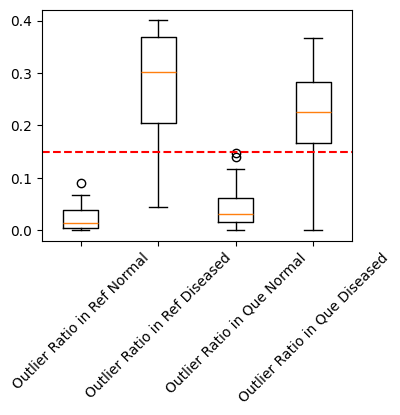

Accuracy: 0.875
Precision: 1.0
Recall: 0.7307692307692307
F1 Score: 0.8444444444444444
==> 5
29 26 30 26


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
2024-12-20 18:07:36,930 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
INFO:harmonypy:Computing initial centroids with sklearn.KMeans...
2024-12-20 18:07:56,904 - harmonypy - INFO - sklearn.KMeans initialization complete.
INFO:harmonypy:sklearn.KMeans initialization complete.
2024-12-20 18:07:57,662 - harmonypy - INFO - Iteration 1 of 1
INFO:harmonypy:Iteration 1 of 1
2024-12-20 18:09:28,442 - harmonypy - INFO - Stopped before convergence
INFO:harmonypy:Stopped before convergence


{'n_comps': 4, 'optimal_k': 5, 'optimal_p': 0.035000000000000024, 'threshold': 0.5049051708647765, 'outlier_ratio': 0.205470737913486, 'ks': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'initial_p_vals': [0.1, 0.05, 0.01], 'ps': array([0.15 , 0.145, 0.14 , 0.135, 0.13 , 0.125, 0.12 , 0.115, 0.11 ,
       0.105, 0.1  , 0.095, 0.09 , 0.085, 0.08 , 0.075, 0.07 , 0.065,
       0.06 , 0.055, 0.05 , 0.045, 0.04 , 0.035, 0.03 , 0.025, 0.02 ,
       0.015, 0.01 , 0.005, 0.   ])}
{'n_comps': 5, 'optimal_k': 6, 'optimal_p': 0.04000000000000003, 'threshold': 0.7385278258044332, 'outlier_ratio': 0.20524947449939152, 'ks': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'initial_p_va

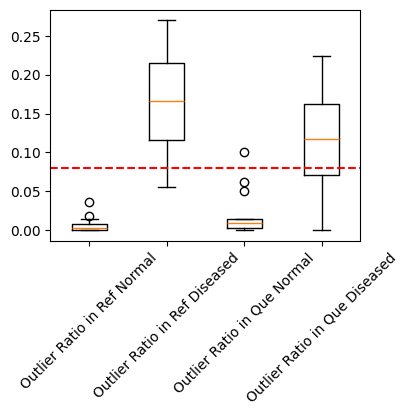

Accuracy: 0.8214285714285714
Precision: 0.9444444444444444
Recall: 0.6538461538461539
F1 Score: 0.7727272727272727
==> 6
29 26 30 26


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
2024-12-20 18:32:50,735 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
INFO:harmonypy:Computing initial centroids with sklearn.KMeans...
2024-12-20 18:33:13,136 - harmonypy - INFO - sklearn.KMeans initialization complete.
INFO:harmonypy:sklearn.KMeans initialization complete.
2024-12-20 18:33:13,987 - harmonypy - INFO - Iteration 1 of 1
INFO:harmonypy:Iteration 1 of 1
2024-12-20 18:34:47,369 - harmonypy - INFO - Stopped before convergence
INFO:harmonypy:Stopped before convergence


{'n_comps': 4, 'optimal_k': 14, 'optimal_p': 0.04000000000000003, 'threshold': 0.5953894631115042, 'outlier_ratio': 0.2585945477612402, 'ks': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'initial_p_vals': [0.1, 0.05, 0.01], 'ps': array([0.15 , 0.145, 0.14 , 0.135, 0.13 , 0.125, 0.12 , 0.115, 0.11 ,
       0.105, 0.1  , 0.095, 0.09 , 0.085, 0.08 , 0.075, 0.07 , 0.065,
       0.06 , 0.055, 0.05 , 0.045, 0.04 , 0.035, 0.03 , 0.025, 0.02 ,
       0.015, 0.01 , 0.005, 0.   ])}
{'n_comps': 5, 'optimal_k': 19, 'optimal_p': 0.04000000000000003, 'threshold': 0.8809356697648879, 'outlier_ratio': 0.2359748739053749, 'ks': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'initial_p_v

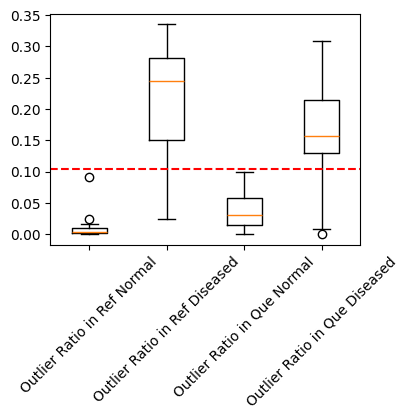

Accuracy: 0.875
Precision: 1.0
Recall: 0.7307692307692307
F1 Score: 0.8444444444444444
==> 7
29 26 30 26


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
2024-12-20 19:00:18,644 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
INFO:harmonypy:Computing initial centroids with sklearn.KMeans...
2024-12-20 19:00:41,356 - harmonypy - INFO - sklearn.KMeans initialization complete.
INFO:harmonypy:sklearn.KMeans initialization complete.
2024-12-20 19:00:42,363 - harmonypy - INFO - Iteration 1 of 1
INFO:harmonypy:Iteration 1 of 1
2024-12-20 19:02:31,508 - harmonypy - INFO - Stopped before convergence
INFO:harmonypy:Stopped before convergence


{'n_comps': 4, 'optimal_k': 14, 'optimal_p': 0.035000000000000024, 'threshold': 0.6773022018553303, 'outlier_ratio': 0.19179028504944734, 'ks': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'initial_p_vals': [0.1, 0.05, 0.01], 'ps': array([0.15 , 0.145, 0.14 , 0.135, 0.13 , 0.125, 0.12 , 0.115, 0.11 ,
       0.105, 0.1  , 0.095, 0.09 , 0.085, 0.08 , 0.075, 0.07 , 0.065,
       0.06 , 0.055, 0.05 , 0.045, 0.04 , 0.035, 0.03 , 0.025, 0.02 ,
       0.015, 0.01 , 0.005, 0.   ])}
{'n_comps': 5, 'optimal_k': 5, 'optimal_p': 0.035000000000000024, 'threshold': 0.7701231056468366, 'outlier_ratio': 0.17681064572425828, 'ks': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'initial_

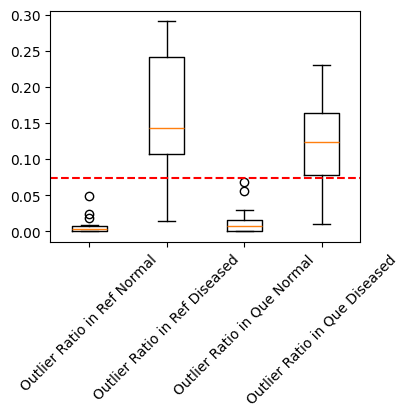

Accuracy: 0.9107142857142857
Precision: 1.0
Recall: 0.8076923076923077
F1 Score: 0.8936170212765957
==> 8
29 26 30 26


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
2024-12-20 19:14:56,633 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
INFO:harmonypy:Computing initial centroids with sklearn.KMeans...
2024-12-20 19:15:16,303 - harmonypy - INFO - sklearn.KMeans initialization complete.
INFO:harmonypy:sklearn.KMeans initialization complete.
2024-12-20 19:15:17,051 - harmonypy - INFO - Iteration 1 of 1
INFO:harmonypy:Iteration 1 of 1
2024-12-20 19:16:50,650 - harmonypy - INFO - Stopped before convergence
INFO:harmonypy:Stopped before convergence


{'n_comps': 4, 'optimal_k': 10, 'optimal_p': 0.030000000000000023, 'threshold': 0.6176731808931597, 'outlier_ratio': 0.22667070055129757, 'ks': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'initial_p_vals': [0.1, 0.05, 0.01], 'ps': array([0.15 , 0.145, 0.14 , 0.135, 0.13 , 0.125, 0.12 , 0.115, 0.11 ,
       0.105, 0.1  , 0.095, 0.09 , 0.085, 0.08 , 0.075, 0.07 , 0.065,
       0.06 , 0.055, 0.05 , 0.045, 0.04 , 0.035, 0.03 , 0.025, 0.02 ,
       0.015, 0.01 , 0.005, 0.   ])}
{'n_comps': 5, 'optimal_k': 6, 'optimal_p': 0.04000000000000003, 'threshold': 0.7517537663391871, 'outlier_ratio': 0.25087400833669493, 'ks': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'initial_p

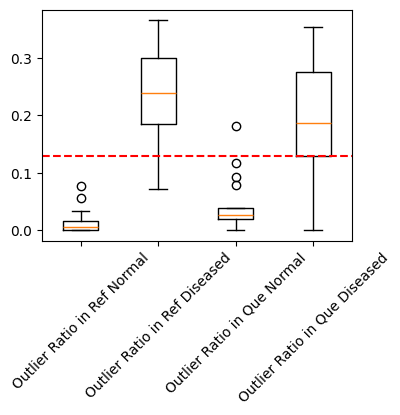

Accuracy: 0.8571428571428571
Precision: 0.95
Recall: 0.7307692307692307
F1 Score: 0.8260869565217391
==> 9
29 26 30 26


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
2024-12-20 19:32:07,082 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
INFO:harmonypy:Computing initial centroids with sklearn.KMeans...
2024-12-20 19:32:26,842 - harmonypy - INFO - sklearn.KMeans initialization complete.
INFO:harmonypy:sklearn.KMeans initialization complete.
2024-12-20 19:32:27,592 - harmonypy - INFO - Iteration 1 of 1
INFO:harmonypy:Iteration 1 of 1
2024-12-20 19:33:57,793 - harmonypy - INFO - Stopped before convergence
INFO:harmonypy:Stopped before convergence


{'n_comps': 4, 'optimal_k': 13, 'optimal_p': 0.035000000000000024, 'threshold': 0.6551163057192085, 'outlier_ratio': 0.27596988646712406, 'ks': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'initial_p_vals': [0.1, 0.05, 0.01], 'ps': array([0.15 , 0.145, 0.14 , 0.135, 0.13 , 0.125, 0.12 , 0.115, 0.11 ,
       0.105, 0.1  , 0.095, 0.09 , 0.085, 0.08 , 0.075, 0.07 , 0.065,
       0.06 , 0.055, 0.05 , 0.045, 0.04 , 0.035, 0.03 , 0.025, 0.02 ,
       0.015, 0.01 , 0.005, 0.   ])}
{'n_comps': 5, 'optimal_k': 26, 'optimal_p': 0.049999999999999926, 'threshold': 0.9634565941022017, 'outlier_ratio': 0.3111225790783802, 'ks': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'initial_

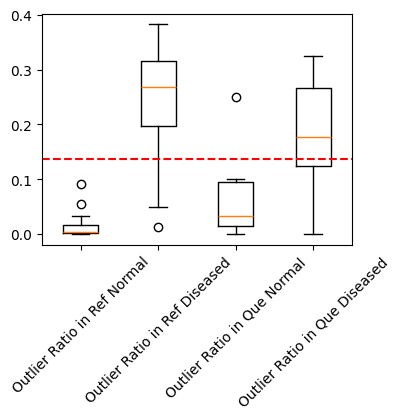

Accuracy: 0.8392857142857143
Precision: 0.9473684210526315
Recall: 0.6923076923076923
F1 Score: 0.8


In [51]:
import json

for i in range(10):
    print('==>', i)
    seed = i * 100
    Dict = process_celltype(seed)
    json.dump(Dict, open(f"{OUTPUT_PATH}/scpss-problem-2/{celltype}/{seed}.json", 'w'), indent=4)

## Integrate pathological scores of cells from each cell type to determine condition of individual

In [52]:
import json

In [53]:
PATH = "/content/drive/MyDrive/Research - Sohel sir/Pathological Cells/Pathological Cell Identification/reproducibility/scpss_data/scpss-problem-2"

In [54]:
celltypes = [
  'Macrophages',
  'AT2',
  'Basal',
  'EC venous',
  'Fibroblasts',
]

In [55]:
my_dict = {}
for celltype in celltypes:
    dicts = []
    for i in range(10):
        fp = f"{PATH}/{celltype}/{i*100}.json"
        with open(fp, 'r') as file:
            data = json.load(file)
        dicts.append(data)
    accs = [d['accuracy'] for d in dicts]
    my_dict[celltype] = accs

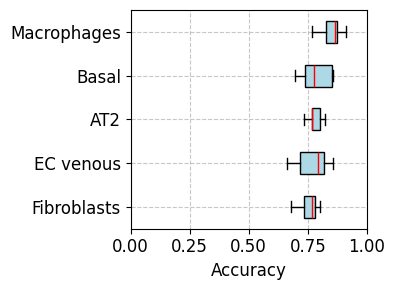

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the dictionary by the mean of the values
sorted_dict = {k: v for k, v in sorted(my_dict.items(), key=lambda item: np.mean(item[1]))}

# Define figure size for better readability
fig, ax = plt.subplots(figsize=(4, 3))

# Create a horizontal box plot with sorted values
ax.boxplot(sorted_dict.values(), vert=False, patch_artist=True,
           boxprops=dict(facecolor='lightblue', color='black'),
           whiskerprops=dict(color='black'),
           capprops=dict(color='black'),
           medianprops=dict(color='red'))

# Set y-axis labels with sorted keys
ax.set_yticklabels(sorted_dict.keys(), fontsize=12)

# Set x-axis label with larger font size
ax.set_xlabel('Accuracy', fontsize=12)

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.7)

# Increase tick label size
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.xlim([0, 1])

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [57]:
for celltype in celltypes:
    print(celltype, np.median(sorted_dict[celltype]), np.mean(sorted_dict[celltype]))

Macrophages 0.8660714285714286 0.8517857142857143
AT2 0.7678571428571429 0.7785714285714287
Basal 0.7767857142857143 0.7875
EC venous 0.7946428571428572 0.7732142857142856
Fibroblasts 0.7678571428571429 0.7535714285714287


In [58]:
def get_upper_limit(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    upper_limit_from_data = q1
    for d in data:
        if d < upper_limit and d > upper_limit_from_data:
            upper_limit_from_data = d

    return upper_limit_from_data

In [59]:
def average_labelling(diseased_portion, upper_limits):
    number = 0
    given_sum = 0
    limit_sum = 0
    for k, v in diseased_portion.items():
        if v is not None:
            number += 1
            given_sum += diseased_portion[k]
            limit_sum += upper_limits[k]

    return max(given_sum - limit_sum, 0) > .2

In [60]:
def average_labelling_score(diseased_portion, upper_limits):
    given_sum = 0
    limit_sum = 0
    for k, v in diseased_portion.items():
        if v is not None:
            given_sum += diseased_portion[k]
            limit_sum += upper_limits[k]
    return max(given_sum - limit_sum, 0)

In [61]:
def any_outlier_labelling(disease_portion, upper_limits):
    for k, v in disease_portion.items():
        if v is not None:
            if disease_portion[k] > upper_limits[k]:
                return True
    return False

In [62]:
def majority_labelling(disease_portion, upper_limits):
    outlier_vote = 0
    inlier_vote = 0
    for k, v in disease_portion.items():
        if v is not None:
            if disease_portion[k] > upper_limits[k]:
                outlier_vote += 1
            else:
                inlier_vote += 1
    return outlier_vote >= inlier_vote

In [63]:
def quick_labelling(disease_portion, upper_limits):
    outlier_vote = 0
    inlier_vote = 0
    for k, v in disease_portion.items():
        if v is not None:
            if disease_portion[k] > upper_limits[k]:
                outlier_vote += 1
            else:
                inlier_vote += 1
    return outlier_vote > 1 and (inlier_vote - outlier_vote) < 3

In [64]:
def priority_labelling(disease_portion, upper_limits):
    for celltype in ('Macrophages', 'EC venous', 'AT2'):
        if disease_portion[celltype] is not None:
            return disease_portion[celltype] > upper_limits[celltype]
    return False

In [65]:
def adjusted_average_labelling(disease_portion, upper_limits, inlier_weight=0.15):
    number = 0
    given_sum = 0
    limit_sum = 0
    for k, v in disease_portion.items():
        if v is not None:
            number += 1
            if disease_portion[k] > upper_limits[k]:
                given_sum += (1 - inlier_weight) * (disease_portion[k] - upper_limits[k]) / (1 - upper_limits[k])
            else:
                given_sum += inlier_weight * (disease_portion[k] - upper_limits[k]) / upper_limits[k]
    return number != 0 and given_sum > 0.1

In [66]:
def adjusted_average_labelling_score(disease_portion, upper_limits, inlier_weight=.2):
    number = 0
    given_sum = 0
    limit_sum = 0
    for k, v in disease_portion.items():
        if v is not None:
            number += 1
            if disease_portion[k] > upper_limits[k]:
                given_sum += (1 - inlier_weight) * (disease_portion[k] - upper_limits[k]) / (1 - upper_limits[k])
            else:
                given_sum += inlier_weight * (disease_portion[k] - upper_limits[k]) / upper_limits[k]
    return given_sum

## All combos

In [67]:
celltypes = [
    'Macrophages',
    'AT2',
    'Basal',
    'EC venous',
    'Fibroblasts'
]

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def get_acc_for_test_id(id=0, labelling_fn=quick_labelling, verbose=False):
    dict_of_dicts = {}

    for celltype in celltypes:
        dict_of_dicts[celltype] = json.loads(open(f"{PATH}/{celltype}/{id*100}.json", 'r').read())

    Dict = dict_of_dicts['Macrophages']
    que_samples = Dict['que_samples']
    que_normal_samples = Dict['que_normal_samples']
    que_disease_samples = Dict['que_disease_samples']

    true_labels = [0] * len(que_normal_samples) + [1] * len(que_disease_samples)

    upper_limits = {}

    def filter_nones(l):
        return [x for x in l if x is not None]

    for celltype in celltypes:
        upper_limits[celltype] = get_upper_limit(filter_nones(dict_of_dicts[celltype]['outlier_ratio_in_ref_normal']))

    label = []
    for i, que_disease in enumerate(Dict['que_normal_samples']):
        disease_portion = {}
        for celltype in celltypes:
            disease_portion[celltype] = dict_of_dicts[celltype]['outlier_ratio_in_que_normal'][i]
        label.append(labelling_fn(disease_portion, upper_limits))

    for i, que_disease in enumerate(Dict['que_disease_samples']):
        disease_portion = {}
        for celltype in celltypes:
            disease_portion[celltype] = dict_of_dicts[celltype]['outlier_ratio_in_que_diseased'][i]
        label.append(labelling_fn(disease_portion, upper_limits))

    predicted_labels = label
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)

    if verbose:
        print(id, accuracy, precision, recall, f1)

    return accuracy, precision, recall, f1, predicted_labels

In [78]:
labelling_algos = {
    'Quick': quick_labelling,
    'Priority': priority_labelling,
    'Majority': majority_labelling,
    'Any': any_outlier_labelling,
    'Average': average_labelling,
    'Adjusted Average 0.30': lambda disease_portion, upper_limits: adjusted_average_labelling(disease_portion, upper_limits, inlier_weight=0.3),
    'Adjusted Average 0.25': lambda disease_portion, upper_limits: adjusted_average_labelling(disease_portion, upper_limits, inlier_weight=0.25),
    'Adjusted Average 0.20': lambda disease_portion, upper_limits: adjusted_average_labelling(disease_portion, upper_limits, inlier_weight=0.2),
    'Adjusted Average 0.15': lambda disease_portion, upper_limits: adjusted_average_labelling(disease_portion, upper_limits, inlier_weight=0.15),
    'Adjusted Average 0.10': lambda disease_portion, upper_limits: adjusted_average_labelling(disease_portion, upper_limits, inlier_weight=0.1),
    'Adjusted Average 0.05': lambda disease_portion, upper_limits: adjusted_average_labelling(disease_portion, upper_limits, inlier_weight=0.05),
    'Adjusted Average 0.03': lambda disease_portion, upper_limits: adjusted_average_labelling(disease_portion, upper_limits, inlier_weight=0.03),
    'Adjusted Average 0.02': lambda disease_portion, upper_limits: adjusted_average_labelling(disease_portion, upper_limits, inlier_weight=0.02),
}

In [79]:
accuracies = {}
precisions = {}
recalls = {}
f1s = {}
predicts = {}

for name, labelling_fn in labelling_algos.items():
    accs, pres, recs, fs, pls = [], [], [], [], []
    for i in range(10):
        accuracy, precision, recall, f1, pl = get_acc_for_test_id(i, labelling_fn)
        accs.append(accuracy)
        pres.append(precision)
        recs.append(recall)
        fs.append(f1)
        pls.append(np.mean(pl))

    accuracies[name] = accs
    precisions[name] = pres
    recalls[name] = recs
    f1s[name] = fs
    predicts[name] = pls

<ipython-input-65-b57416a79fc0>:11: RuntimeWarning: invalid value encountered in scalar divide
  given_sum += inlier_weight * (disease_portion[k] - upper_limits[k]) / upper_limits[k]
<ipython-input-65-b57416a79fc0>:11: RuntimeWarning: invalid value encountered in scalar divide
  given_sum += inlier_weight * (disease_portion[k] - upper_limits[k]) / upper_limits[k]
<ipython-input-65-b57416a79fc0>:11: RuntimeWarning: invalid value encountered in scalar divide
  given_sum += inlier_weight * (disease_portion[k] - upper_limits[k]) / upper_limits[k]
<ipython-input-65-b57416a79fc0>:11: RuntimeWarning: invalid value encountered in scalar divide
  given_sum += inlier_weight * (disease_portion[k] - upper_limits[k]) / upper_limits[k]
<ipython-input-65-b57416a79fc0>:11: RuntimeWarning: invalid value encountered in scalar divide
  given_sum += inlier_weight * (disease_portion[k] - upper_limits[k]) / upper_limits[k]
<ipython-input-65-b57416a79fc0>:11: RuntimeWarning: invalid value encountered in scal

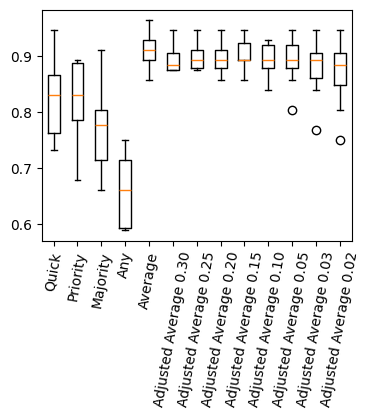

In [80]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.boxplot(accuracies.values())
ax.set_xticklabels(accuracies.keys())
plt.xticks(rotation=80)
plt.show()

In [81]:
for name, acc in accuracies.items():
    print(name, np.median(acc), np.mean(acc))

Quick 0.8303571428571428 0.825
Priority 0.8303571428571428 0.8178571428571427
Majority 0.7767857142857143 0.775
Any 0.6607142857142857 0.6625000000000001
Average 0.9107142857142857 0.9107142857142858
Adjusted Average 0.30 0.8839285714285714 0.8928571428571429
Adjusted Average 0.25 0.8928571428571429 0.9017857142857142
Adjusted Average 0.20 0.8928571428571429 0.8982142857142857
Adjusted Average 0.15 0.8928571428571429 0.9017857142857142
Adjusted Average 0.10 0.8928571428571429 0.8946428571428571
Adjusted Average 0.05 0.8928571428571429 0.8910714285714286
Adjusted Average 0.03 0.8928571428571429 0.8785714285714284
Adjusted Average 0.02 0.8839285714285714 0.8696428571428572


In [82]:
print_dict_comb = {}

for name, acc in sorted_dict.items():
    print_dict_comb[name] = acc

print_dict_comb['All'] = accuracies['Average']

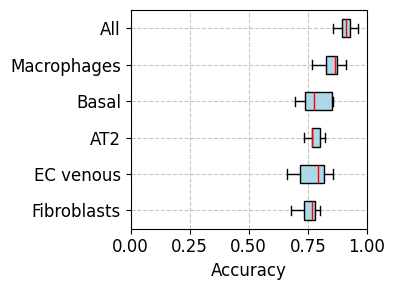

In [83]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the dictionary by the mean of the values
sorted_dict = {k: v for k, v in sorted(print_dict_comb.items(), key=lambda item: np.mean(item[1]))}

# Define figure size for better readability
fig, ax = plt.subplots(figsize=(4, 3))

# Create a horizontal box plot with sorted values
ax.boxplot(print_dict_comb.values(), vert=False, patch_artist=True,
           boxprops=dict(facecolor='lightblue', color='black'),
           whiskerprops=dict(color='black'),
           capprops=dict(color='black'),
           medianprops=dict(color='red'))

# Set y-axis labels with sorted keys
ax.set_yticklabels(print_dict_comb.keys(), fontsize=12)

# Set x-axis label with larger font size
ax.set_xlabel('Accuracy', fontsize=12)

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.7)

# Increase tick label size
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.xlim([0, 1])

# Tight layout for better spacing
plt.tight_layout()

plt.savefig('accuracy_supervised.svg')

# Show the plot
plt.show()
